# Example 4. Adaptive Linear Neuron Gradian Decent
---
The **Adaptive Linear Neuron Gradian Decent** is also called **Adaline**.
1. **Adaptive** : Define a *cost function* and find its **minimum** solution iteratively. Here is the *cost function* is defined as $$ J(w) = \frac{1}{2}\sum_i^N{[y_i-\phi(z_i(w))]^2}\ ,$$ which is called **Sum of Squarde Error**, where $w$ a vector containing the learning weights $\{w_0, w_1, w_2,..., w_d\}$ with certain dimension $d$; $i$ and $N$ is the data number and size; $y$ is the target value; $\phi$ is a *objective function* as function of $z$; $z$ is as function of $w$ and correlated to the feature variables $\{x_0, x_1, x_2,..., x_d\}$; and $\frac{1}{2}$ is for differential calculation. Thus, to find the minimum cost, the learning weights $w$ has to be updated iteratively as <br /> $$ w := w + d{w}\ ,$$ where $:=$ means the left $w$ was updated by adding $dw$ from previours iteration.  
2. **Linear** : Define a **linear** *objective function* for each data point as <br /> 
$$
\begin{equation}
\begin{split}
\phi(z) &= w_0x_0+w_1x_1+w_2x_2...+w_dx_d \\
&= w^Tx \\
&\equiv z(w)\ .
\end{split}
\end{equation}
$$
3. **Neuron** : Inspired from the concept of perceptron.
4. **Gradian decent** : Use the first differential of *cost function* to find the minimum solution of $w$. Thus, the updating weight can be defined as <br />$$ d{w} = -\eta\nabla J(w)\ .$$ Since $dw$ is expected to be getting small and approach to 0 iteratively, the $-$ sign represents the decaying value of $dw$.<br />
$$
\begin{equation}
\begin{split}
\nabla J(w) &= \sum_d\frac{\partial J(w)}{\partial w_d} \\
&= \sum_d\frac{\partial \phi}{\partial w_d}\frac{\partial J}{\partial \phi}
&= -\sum_i^N[y_i-\phi(z_i(w))]x_i\ .
\end{split}
\end{equation}
$$
Thus, by replacing this results to $dw$, the final updated weight will be $$w+dw = w + \eta\sum_i^N[y_i-\phi(z_i(w))]x_i\ .$$
Actaully, the form of last term is the simlar as perceptron linear algorithm (PLA) but with summing over the data, so called *batch learning*. PLA is *online learning*, i.e. the weight is updated by each data point. 

---
### Import basic needed modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plot_decision_regions import * 

---
### Load and setup data/variables 
1\. Input Iris.data (.CSV) with *pandas* to be a dataframe (df)

In [2]:
df0 = pd.read_csv('iris.data', header=None)[:100] # Keep data from 0-99
df0.columns = ['sepal_length', 'x_1', 'petal_length', 'x_3', 'type']
df0.tail()

,sepal_length,x_1,petal_length,x_3,type
95,5.7,3.0,4.2,1.2,Iris-versicolor
96,5.7,2.9,4.2,1.3,Iris-versicolor
97,6.2,2.9,4.3,1.3,Iris-versicolor
98,5.1,2.5,3.0,1.1,Iris-versicolor
99,5.7,2.8,4.1,1.3,Iris-versicolor


In [3]:
# Optional : Shuffle (fix the seed) order of data, list last 10 rows
np.random.seed(4) # welcome to play arround the number to observe
df = df0.reindex(np.random.permutation(df0.index))
df.iloc[90:]

,sepal_length,x_1,petal_length,x_3,type
98,5.1,2.5,3.0,1.1,Iris-versicolor
58,6.6,2.9,4.6,1.3,Iris-versicolor
9,4.9,3.1,1.5,0.1,Iris-setosa
50,7.0,3.2,4.7,1.4,Iris-versicolor
72,6.3,2.5,4.9,1.5,Iris-versicolor
87,6.3,2.3,4.4,1.3,Iris-versicolor
1,4.9,3.0,1.4,0.2,Iris-setosa
69,5.6,2.5,3.9,1.1,Iris-versicolor
55,5.7,2.8,4.5,1.3,Iris-versicolor
46,5.1,3.8,1.6,0.2,Iris-setosa


2\. Extract 100 data from dataframe df 
* No.4 colume to y
* No.0 & 2 columes to be X, with 2-D variables

In [4]:
# Filling y and X
y = df.iloc[:, 4].values
X = df.iloc[:, [0,2]].values
idx = df.index.values
print idx

[20 10 96 16 63 24 53 97 41 47 43  2 95 26 13 37 14 29 35 54 80  4 81 76 85
 60  5 70 71 19 65 62 27 75 61 78 18 88  7 39  6 77 11 59 22 94 23 12 92 25
 83 48 17 68 31 34 15 51 86 82 28 64 67 33 45 42 40 32 91 74 49  8 30 99 66
 56 84 73 79 21 89  0  3 52 38 44 93 36 57 90 98 58  9 50 72 87  1 69 55 46]


3\. Change the text to distigushable real rumber in y

In [5]:
y = np.where(y == 'Iris-setosa', -1, 1)

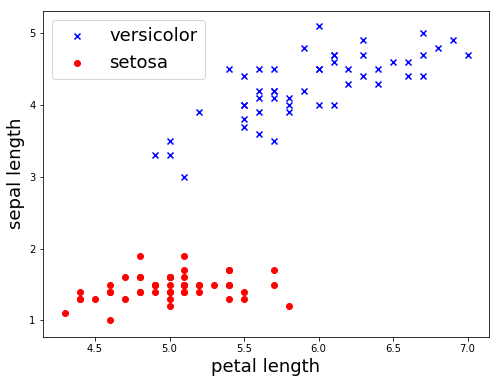

In [6]:
# Ploting : significance variables
plt.figure(figsize=(8, 6))
plt.scatter(X[ y == 1, 0], X[ y == 1, 1], color='blue', marker='x', label='versicolor')
plt.scatter(X[ y ==-1, 0], X[ y ==-1, 1], color='red',  marker='o', label='setosa')
plt.xlabel('petal length', fontsize=18)
plt.ylabel('sepal length', fontsize=18)
plt.legend(loc='upper left', fontsize=18)
plt.show()

---
### Run hand-made Adaline gradian decent
1\. Import hand-made Adaline gradian decent class

In [7]:
from AdalineGD import AdalineGD

2\. Show the effect of learing rate (eta)
   * Create a figure & 2 subplots
   * Train data with eta = 0.01 & 0.001 

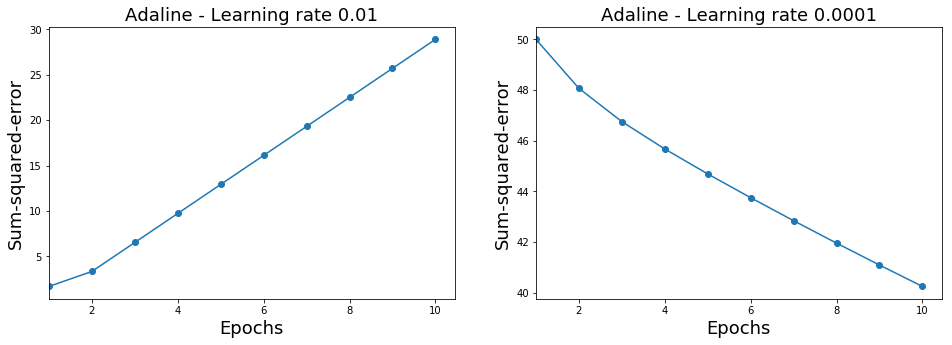

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs', fontsize=18)
ax[0].set_ylabel('Sum-squared-error', fontsize=18)
ax[0].set_title('Adaline - Learning rate 0.01', fontsize=18)
ax[0].set_xlim(xmin=1)

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs', fontsize=18)
ax[1].set_ylabel('Sum-squared-error', fontsize=18)
ax[1].set_title('Adaline - Learning rate 0.0001', fontsize=18)
ax[1].set_xlim(xmin=1)
plt.show()

In [9]:
print 'The weights of eta=0.01   : '+str(ada1.w_)
print 'The weights of eta=0.0001 : '+str(ada2.w_)

The weights of eta=0.01   : [ -3.79038389e+13  -2.11689469e+14  -1.18464807e+14]
The weights of eta=0.0001 : [-0.01174401 -0.02122706  0.09641832]


In [10]:
plt.figure(figsize=(8, 6))
plot_decision_regions(X, y, classifier=ada2)
plt.title('Adline - Gradient Decent eta=0.0001')
plt.xlabel('sepal length [cm]', fontsize=18)
plt.ylabel('petal length [cm]', fontsize=18)
plt.legend(loc='upper left', fontsize=18)
#plt.show()

In [11]:
x = np.arange(0., 8., 0.1)
c0 = -1*ada2.w_[0]/ada2.w_[2]
c1 = -1*ada2.w_[1]/ada2.w_[2]

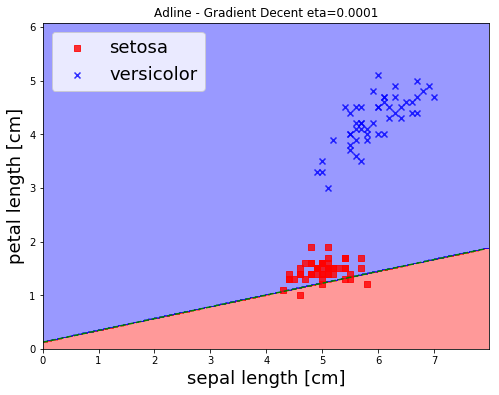

Green line : y = 0.12 + 0.22*x = 0
Blue y > 0, red y < 0


In [12]:
plt.plot(x, c0+c1*x, 'g--')
plt.show()
print 'Green line : y = %.2f + %.2f*x = 0'%(c0, c1)
print 'Blue y > 0, red y < 0'

### Conclusion
* The $\eta$ can affect the learning performance. $\eta=0.01$ is too big to find the best solution and gets large errors, since it overshoot the global minimum of cost function. But $\eta=0.0001$ needs more iteration to find the minimum, since it is too small.<br />
* On the other hand, since this is *batch learning*, i.e. only updating weights after going through all data, the results are the same between with and without suffleing dataframe.<br /> 
* However, this learning model is using the true values instead of using sign of predicted number, the strengthes of the variables are relevent to the results, so we have to used *standarlized* data before training, see next section :-)

---
## Using standarized data
### Standardization result
As we have discussed in previours section, the strengthes of the variables are relevent to the result, since the *cost function* of regression considers the true values of difference between the target and predict instead of sign. The standarization method has to be applied before training. The standarization can follow this rule $$x^{'}_d = \frac{x_d-\mu_d}{\sigma_d}\ ,$$ where $x'_d$ is the standarized variable, $\mu_d$ and $\sigma_d$ is the **mean** and **standard diviation** of $x_d$. Here we are going to use ``Numpy`` to make standarized data.

1\. Create and standarizing dataframe with ``Numpy``

In [13]:
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std() # sepal_length
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std() # petal_length
df_std = pd.DataFrame(data=X_std[:,:], index=idx[:], columns=['sepal_length','petal_length'])

2\. Compare to original dataframe

In [14]:
df.loc[90:,['sepal_length', 'petal_length']]

,sepal_length,petal_length
90,5.5,4.4
98,5.1,3.0
58,6.6,4.6
9,4.9,1.5
50,7.0,4.7
72,6.3,4.9
87,6.3,4.4
1,4.9,1.4
69,5.6,3.9
55,5.7,4.5


In [15]:
#df_std.iloc[89:]
df_std.loc[90:,:]

,sepal_length,petal_length
90,0.045420,1.067090
98,-0.581066,0.095747
58,1.768257,1.205853
9,-0.894309,-0.944978
50,2.394743,1.275234
72,1.298393,1.413998
87,1.298393,1.067090
1,-0.894309,-1.014360
69,0.202042,0.720181
55,0.358663,1.136471


3\. Re-train the data after standarization.

In [16]:
eta=0.01
n_iter=40
ada_std = AdalineGD(n_iter=n_iter, eta=eta).fit(X_std, y)

In [17]:
plt.figure(figsize=(8, 6))
plot_decision_regions(X_std, y, classifier=ada_std)
plt.title('Adline - Gradient Decent')
plt.xlabel('sepal length [standardized] [cm]', fontsize=18)
plt.ylabel('petal length [standardized] [cm]', fontsize=18)
plt.legend(loc='upper left', fontsize=18)
#plt.show()

In [18]:
x = np.arange(-4, 4., 0.1)
c0 = -1*ada_std.w_[0]/ada_std.w_[2]
c1 = -1*ada_std.w_[1]/ada_std.w_[2]

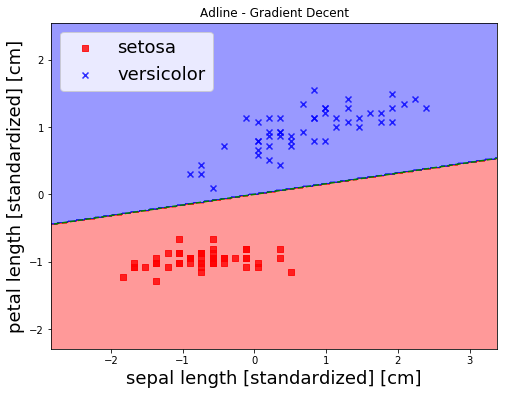

Green line : y = 0.00 + 0.16*x = 0
Blue y > 0, red y < 0


In [19]:
plt.plot(x, c0+c1*x, 'g--')
plt.show()
print 'Green line : y = %.2f + %.2f*x = 0'%(c0, c1)
print 'Blue y > 0, red y < 0'

In [20]:
print 'The weights of eta=0.01 [std]: '+str(ada_std.w_)

The weights of eta=0.01 [std]: [ -6.15063556e-16  -1.75506498e-01   1.11229645e+00]


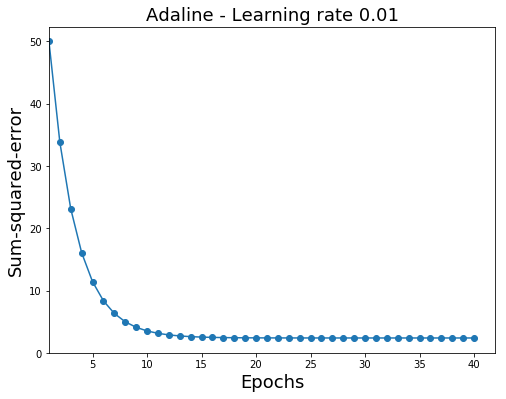

In [21]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(ada_std.cost_) + 1), ada_std.cost_, marker='o')
plt.xlabel('Epochs', fontsize=18)
plt.ylabel('Sum-squared-error', fontsize=18)
plt.title('Adaline - Learning rate 0.01', fontsize=18)
plt.xlim(xmin=1)
plt.show()

### Appendix 1. Visualized iterations

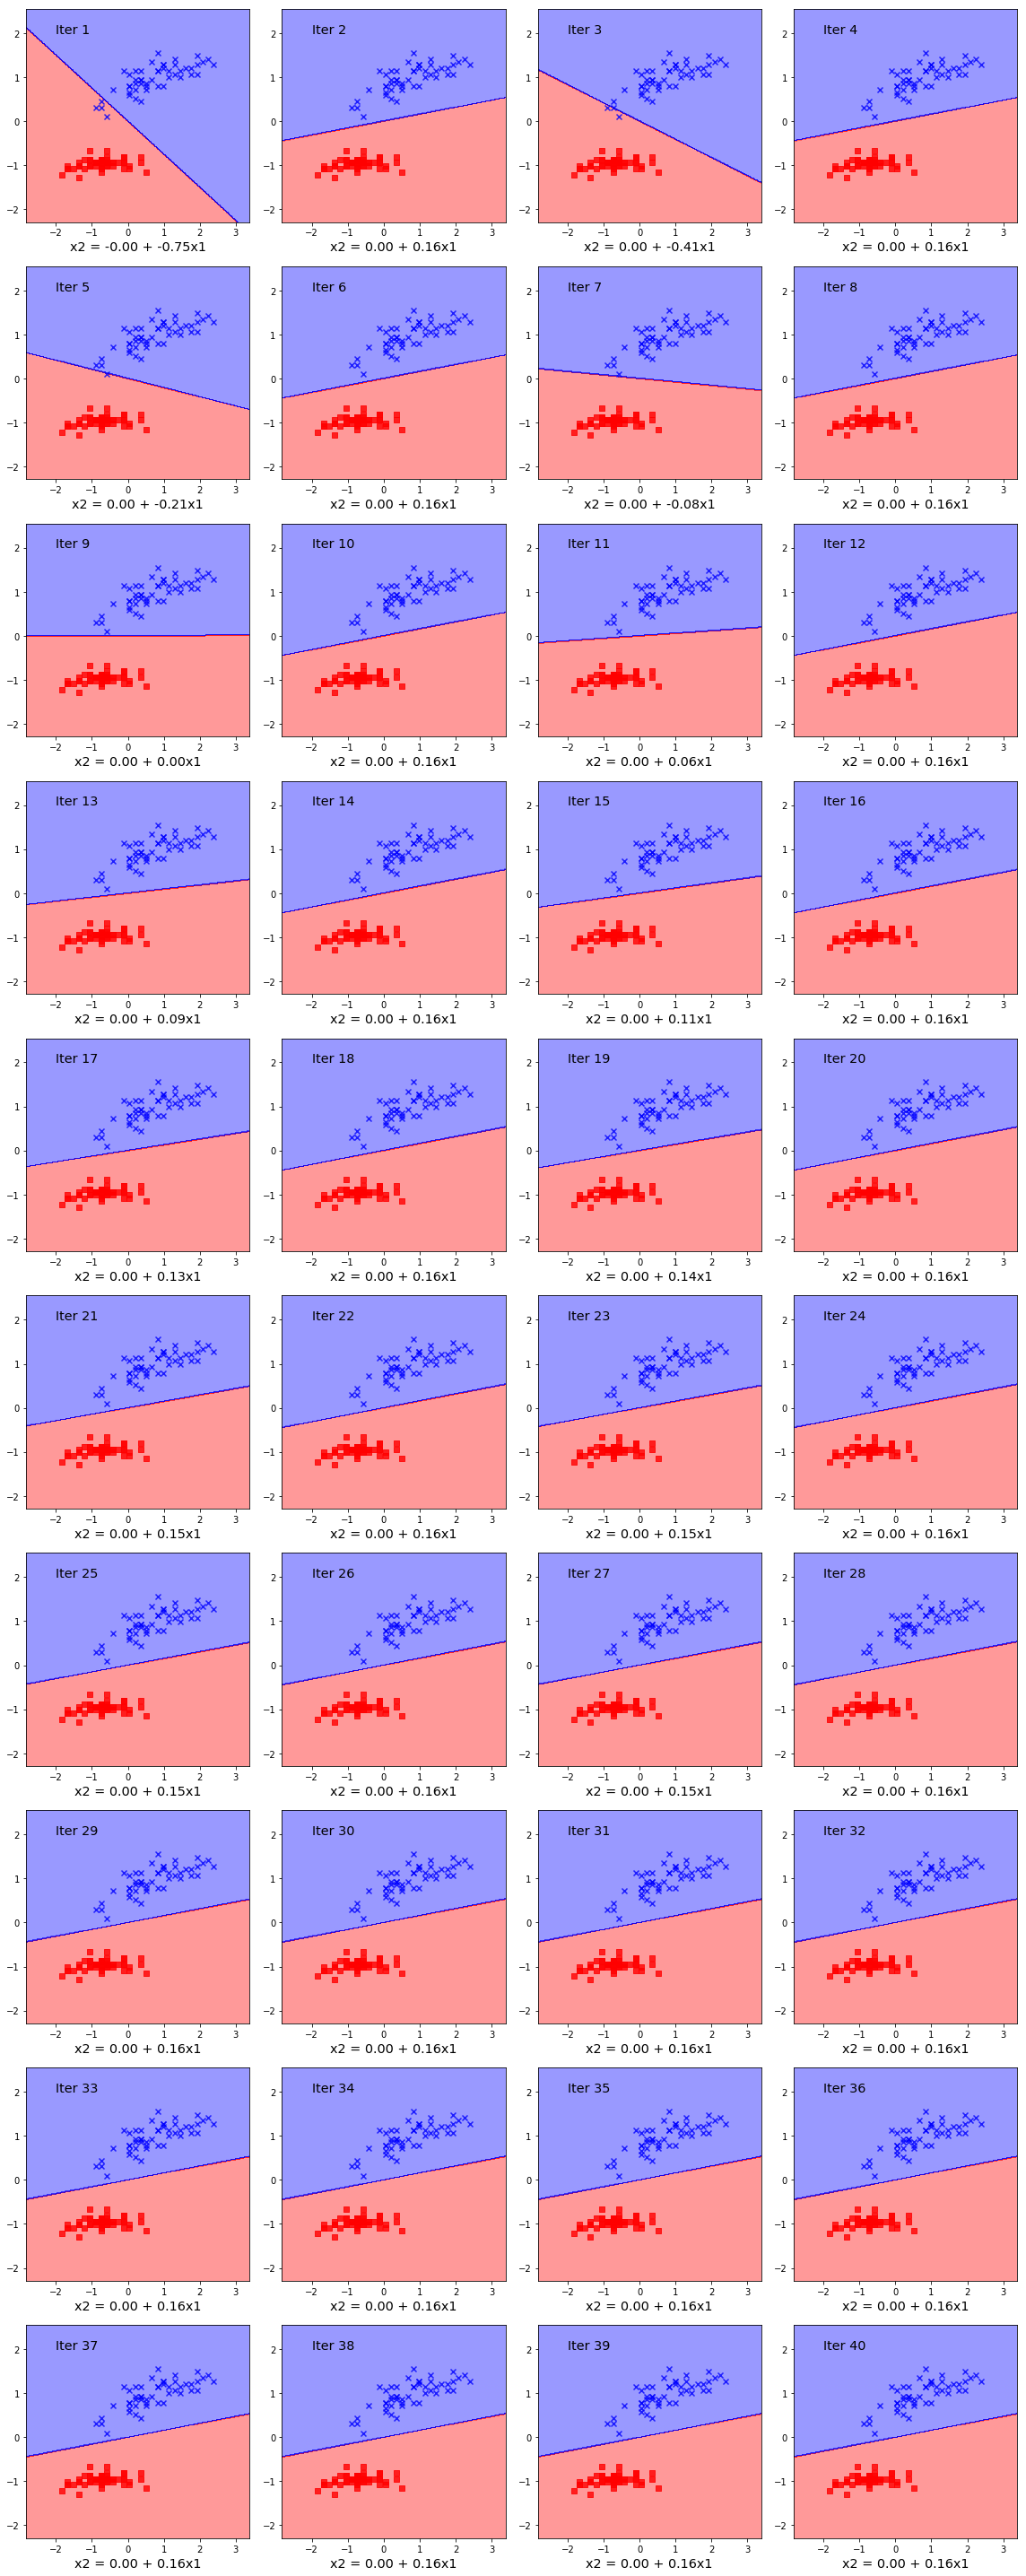

In [22]:
fig = plt.figure(figsize=(16, n_iter))

for i in range(1, n_iter+1):
    ada_i = AdalineGD(n_iter=i, eta=eta).fit(X_std, y)
    fig.add_subplot(n_iter/4, 4, i)
    plot_decision_regions(X_std, y, classifier=ada_i)
    c0 = -1*ada_i.w_[0]/ada_i.w_[2]
    c1 = -1*ada_i.w_[1]/ada_i.w_[2]
    plt.xlabel('x2 = %.2f + %.2fx1'%(c0, c1), fontsize='x-large' )
    plt.text(-2, 2, 'Iter '+str(i), fontsize='x-large')
plt.tight_layout()
plt.show()

### Appendix 2. Project back to orignal feature space
1\. Rewrite ``plot_decision_regions``

In [23]:
def plot_decision_regions_std(X, y, classifier_std, resolution=0.02, zeroRange=0.0001):
    ### setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'ligtgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    X_std = np.copy(X)
    X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
    X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()
    
    ### plot the decision suface    
    x1_min_std = X_std[:, 0].min() - 1 if X_std[:, 0].min() - 1 < 0 else 0
    x2_min_std = X_std[:, 1].min() - 1 if X_std[:, 0].min() - 1 < 0 else 0
    x1_max_std = X_std[:, 0].max() + 1
    x2_max_std = X_std[:, 1].max() + 1

    # Making a grid 2-D suface w.r.t. the resolution
    xx1_std, xx2_std = np.meshgrid( np.arange(x1_min_std, x1_max_std, resolution),
                                    np.arange(x2_min_std, x2_max_std, resolution))
    
    xx1 = xx1_std*X[:,0].std()+X[:,0].mean()
    xx2 = xx2_std*X[:,1].std()+X[:,1].mean()

    Z = classifier_std.predict(np.array([xx1_std.ravel(), xx2_std.ravel()]).T, outputBound=True, zeroRange=zeroRange)
    Z = Z.reshape(xx1_std.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(0, xx1.max())
    plt.ylim(0, xx2.max())

    # Plot original samples
    for idx, c1 in enumerate(np.unique(y)):
        plt.scatter(x=X[y == c1, 0], y=X[y == c1, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label='setosa' if c1==-1 else 'versicolor' )
   
    # Find the line and weights
    bPoints = np.array([])
    for i, z in enumerate(Z.ravel()):
        if abs(z) < zeroRange:
            if len(bPoints) == 0:
                bPoints = np.array([xx1.ravel()[i], xx2.ravel()[i]])
            else:
                bPoints = np.vstack( (bPoints, [xx1.ravel()[i], xx2.ravel()[i]]) )

    if len(bPoints) > 2:    
        bPars = np.polyfit(bPoints[:,0], bPoints[:,1], 1)
        bFunc = np.poly1d(bPars)
        xf = np.linspace(0, xx1.max(), 100)
        yf = bFunc(xf)
        plt.plot(bPoints[:,0], bPoints[:,1], 'g*', xf, yf, 'b-')
        print 'Original liear boundary function x2 = %.2f + %.2fx1'%(bPars[1], bPars[0])
    else:
        print '[WARNING] Not enough point for finding boundary, please reduce the zeroRange: '+str(zeroRange)

Original liear boundary function x2 = 0.91 + 0.36x1


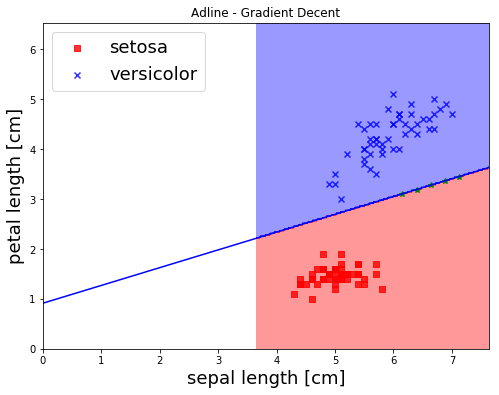

In [24]:
plt.figure(figsize=(8, 6))
plot_decision_regions_std(X, y, classifier_std=ada_std)
plt.title('Adline - Gradient Decent')
plt.xlabel('sepal length [cm]', fontsize=18)
plt.ylabel('petal length [cm]', fontsize=18)
plt.legend(loc='upper left', fontsize=18)
plt.show()

### Conclusion
Comparing to with and without the standardization, the learning curve can reach the stable bottom mcuh quick than without standardization. Since the standardization transform the value of varibales to Gaussian distribution with mean value = 0, the hyperplane is located at $(0,0)$ and only changes the slope of the linear fuction iteratively, which you can observe from the fucntion of decision boundary. Thus, the $w_0$ keeps in zero. On the other hand, you can find the decision boundary is quite different with the results from PLA, the x2-intercept is higher than PLA's.